<a href="https://colab.research.google.com/github/MS-H2020/Open/blob/main/PCB_defect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCB defect detection

##### Thanks to [Samyak Jain](https://medium.com/the-modern-scientist/yolov8-training-on-custom-data-3460f922ce86)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ultralytics
!pip install -U ultralytics sahi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 14.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=15dfe0b4ad6cf83a5c9aea81d7d8a17220bfc6b6173db3d52520162b77460af4
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.10.0.84
    Uninstalling opencv-python-4.10.0.84:
      Successfully uninstalled opencv-python-4.10.0.84


In [39]:
!pip install -U imantics

  Preparing metadata (setup.py) ... done
  Created wheel for imantics: filename=imantics-0.1.12-py3-none-any.whl size=16010 sha256=8220eb39069c7660594efb3dfcde2908452046147b228cbcc49c105590364936
  Stored in directory: /root/.cache/pip/wheels/56/6a/be/4c60e88b14abec4e93234a1f7f91ce8abe1ae88a2b3eaad3ac
Successfully built imantics


In [4]:
import ultralytics
from ultralytics import YOLO

In [5]:
import shutil
shutil.unpack_archive('/content/drive/MyDrive/PCB_Dataset_Defect.zip', './PCB_Dataset_Defect')

In [6]:
text ="""
path: ../PCB_Dataset_Defect
train: train/images
val: valid/images

# Classes
nc: 6
names: ['missing_hole','mouse_bite','open_circuit','short', 'spur','spurious_copper']
"""

with open('./data.yaml', 'w') as file:
    file.write(text)

In [7]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 90.1MB/s]


In [8]:
results = model.train(data='./data.yaml', batch=-1, epochs=100, device=0)

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./data.yaml, epochs=100, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

100%|██████████| 755k/755k [00:00<00:00, 22.3MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

/usr/local/lib/python3.10/dist-packages/ultralytics/engine/trainer.py:268: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)


     3012018         8.2         0.201         43.11           171        (1, 3, 640, 640)                    list
     3012018        16.4         0.298         32.84         40.19        (2, 3, 640, 640)                    list
     3012018        32.8         0.526          19.7         29.62        (4, 3, 640, 640)                    list
     3012018        65.6         1.007         23.93         34.08        (8, 3, 640, 640)                    list
     3012018       131.2         1.984            40         48.09       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 72 for CUDA:0 8.84G/14.75G (60%) ✅


train: Scanning /content/PCB_Dataset_Defect/train/labels... 541 images, 0 backgrounds, 0 corrupt: 100%|██████████| 541/541 [00:00<00:00, 2001.34it/s]

train: New cache created: /content/PCB_Dataset_Defect/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/PCB_Dataset_Defect/valid/labels... 62 images, 0 backgrounds, 0 corrupt: 100%|██████████| 62/62 [00:00<00:00, 982.49it/s]

val: New cache created: /content/PCB_Dataset_Defect/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005625000000000001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.33G      4.285      10.57      2.282        208        640: 100%|██████████| 8/8 [00:42<00:00,  5.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  7.00s/it]

                   all         62        273          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.11G      3.772      8.158       1.82        248        640: 100%|██████████| 8/8 [00:24<00:00,  3.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         62        273          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.24G      3.381      6.291      1.415        235        640: 100%|██████████| 8/8 [00:21<00:00,  2.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all         62        273          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.22G      2.998      5.438      1.241        251        640: 100%|██████████| 8/8 [00:16<00:00,  2.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all         62        273          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       9.1G      2.768      4.905      1.169        210        640: 100%|██████████| 8/8 [00:12<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.58s/it]

                   all         62        273          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.26G      2.655      4.256      1.123        221        640: 100%|██████████| 8/8 [00:11<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all         62        273    0.00325      0.213     0.0253     0.0118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.25G        2.5      3.787      1.078        256        640: 100%|██████████| 8/8 [00:09<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         62        273    0.00668      0.401      0.141     0.0642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       9.1G       2.42      3.424      1.056        292        640: 100%|██████████| 8/8 [00:13<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         62        273    0.00541      0.306      0.128     0.0555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.22G      2.299       3.04      1.023        268        640: 100%|██████████| 8/8 [00:11<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         62        273     0.0426      0.523      0.191     0.0817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.22G       2.32      2.913      1.034        278        640: 100%|██████████| 8/8 [00:10<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]

                   all         62        273      0.904     0.0327      0.226     0.0887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.22G      2.249      2.655      1.021        236        640: 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         62        273    0.00874      0.466      0.229     0.0933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.22G      2.183      2.543      1.009        282        640: 100%|██████████| 8/8 [00:10<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         62        273      0.532       0.16      0.336      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.12G      2.193      2.404      1.008        249        640: 100%|██████████| 8/8 [00:11<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         62        273      0.721      0.213      0.381       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.22G      2.092      2.216      0.987        232        640: 100%|██████████| 8/8 [00:10<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all         62        273      0.843      0.301      0.518      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       9.1G      2.051      2.068     0.9875        179        640: 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all         62        273      0.749      0.246      0.472       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.22G      2.089      2.064     0.9729        244        640: 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         62        273      0.748      0.201      0.484      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.22G      2.054      1.983     0.9697        246        640: 100%|██████████| 8/8 [00:10<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         62        273      0.764      0.315      0.524      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       9.1G      2.041      1.887     0.9808        207        640: 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         62        273      0.787      0.546      0.631      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       9.1G      1.989      1.819     0.9652        231        640: 100%|██████████| 8/8 [00:11<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

                   all         62        273      0.738      0.491      0.601      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.22G      1.996      1.767     0.9627        248        640: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all         62        273       0.72      0.587      0.653      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.12G      2.031      1.748      0.968        294        640: 100%|██████████| 8/8 [00:09<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         62        273      0.725      0.534      0.617      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.12G      1.955      1.636      0.951        263        640: 100%|██████████| 8/8 [00:12<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all         62        273      0.738      0.562      0.628      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.22G      1.974      1.597     0.9497        246        640: 100%|██████████| 8/8 [00:10<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         62        273      0.774      0.626       0.69      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.12G      1.976      1.588     0.9626        229        640: 100%|██████████| 8/8 [00:09<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all         62        273      0.759      0.654      0.716        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.22G      1.932      1.482     0.9492        270        640: 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

                   all         62        273      0.773      0.656       0.72      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       9.1G       1.87      1.446     0.9429        235        640: 100%|██████████| 8/8 [00:11<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         62        273      0.755      0.648      0.712      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       9.1G      1.852      1.414     0.9443        229        640: 100%|██████████| 8/8 [00:15<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         62        273      0.789      0.647        0.7      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.26G      1.848      1.366     0.9297        223        640: 100%|██████████| 8/8 [00:11<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         62        273      0.824      0.648      0.741      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.22G      1.875      1.379     0.9477        221        640: 100%|██████████| 8/8 [00:15<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         62        273      0.752      0.676      0.736      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.12G      1.852      1.335     0.9386        266        640: 100%|██████████| 8/8 [00:11<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

                   all         62        273      0.813      0.659      0.758       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.24G      1.806      1.302     0.9291        211        640: 100%|██████████| 8/8 [00:09<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all         62        273      0.831      0.704      0.766      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       9.1G      1.819      1.304     0.9274        242        640: 100%|██████████| 8/8 [00:08<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         62        273      0.818       0.66      0.738       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.12G      1.849      1.271     0.9461        246        640: 100%|██████████| 8/8 [00:11<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         62        273      0.731      0.641       0.67      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.12G      1.793      1.252     0.9303        213        640: 100%|██████████| 8/8 [00:12<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         62        273      0.878      0.757      0.831      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.24G      1.813      1.247     0.9206        215        640: 100%|██████████| 8/8 [00:10<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all         62        273      0.907      0.685      0.798      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       9.1G       1.77      1.212     0.9169        247        640: 100%|██████████| 8/8 [00:10<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]

                   all         62        273       0.77      0.715      0.792      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       9.1G      1.833      1.244     0.9274        240        640: 100%|██████████| 8/8 [00:10<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all         62        273      0.786      0.723      0.787      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.26G      1.751      1.132     0.9222        235        640: 100%|██████████| 8/8 [00:09<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         62        273      0.892      0.678      0.798      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.12G      1.783      1.179     0.9173        235        640: 100%|██████████| 8/8 [00:13<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         62        273      0.887      0.711      0.801      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.24G      1.765      1.155      0.924        208        640: 100%|██████████| 8/8 [00:12<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         62        273      0.879      0.778      0.841      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.12G      1.835      1.187     0.9234        257        640: 100%|██████████| 8/8 [00:09<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]

                   all         62        273      0.861      0.744      0.828      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.22G       1.77      1.141     0.9153        244        640: 100%|██████████| 8/8 [00:09<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         62        273      0.881      0.782      0.839      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.26G      1.766      1.116     0.9241        212        640: 100%|██████████| 8/8 [00:11<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         62        273      0.921      0.759      0.839      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.12G      1.699      1.056     0.9202        215        640: 100%|██████████| 8/8 [00:10<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         62        273      0.904      0.785      0.855      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.12G      1.691      1.056      0.903        233        640: 100%|██████████| 8/8 [00:12<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         62        273      0.927      0.776      0.858      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       9.1G      1.746      1.106     0.9134        282        640: 100%|██████████| 8/8 [00:14<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

                   all         62        273      0.863      0.768      0.844      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.12G      1.697      1.052     0.9046        213        640: 100%|██████████| 8/8 [00:12<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all         62        273      0.853      0.779      0.831      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.24G      1.676      1.054     0.9129        231        640: 100%|██████████| 8/8 [00:11<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all         62        273      0.913      0.761       0.84      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.22G      1.698      1.061     0.9114        217        640: 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]

                   all         62        273      0.896      0.813      0.864      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.28G      1.649       1.02     0.9032        235        640: 100%|██████████| 8/8 [00:09<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         62        273      0.914      0.791      0.863      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      9.12G      1.622      1.002     0.8963        251        640: 100%|██████████| 8/8 [00:11<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         62        273      0.899       0.77      0.849      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.28G      1.671      1.011     0.9028        261        640: 100%|██████████| 8/8 [00:12<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all         62        273      0.924      0.774      0.863      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.12G      1.629     0.9771      0.898        237        640: 100%|██████████| 8/8 [00:12<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         62        273      0.864      0.793      0.844      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.26G      1.676     0.9998     0.8996        220        640: 100%|██████████| 8/8 [00:13<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.54s/it]

                   all         62        273      0.896      0.788      0.841      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.24G      1.684     0.9814     0.9004        251        640: 100%|██████████| 8/8 [00:13<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

                   all         62        273      0.855      0.782      0.846      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      9.24G      1.622     0.9644     0.9036        269        640: 100%|██████████| 8/8 [00:14<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         62        273      0.932      0.729       0.85       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      9.12G      1.639     0.9656     0.9004        258        640: 100%|██████████| 8/8 [00:12<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.73s/it]

                   all         62        273      0.895      0.789      0.855       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.22G       1.63     0.9811     0.8898        196        640: 100%|██████████| 8/8 [00:11<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         62        273      0.879      0.786       0.86      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       9.1G      1.641     0.9827     0.8981        198        640: 100%|██████████| 8/8 [00:15<00:00,  1.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         62        273      0.877      0.802      0.867      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.12G      1.579     0.9247      0.888        227        640: 100%|██████████| 8/8 [00:12<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         62        273      0.905      0.786      0.856      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       9.1G      1.583      0.921     0.8878        238        640: 100%|██████████| 8/8 [00:11<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]

                   all         62        273      0.901      0.791      0.858      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.22G      1.611     0.9272       0.89        219        640: 100%|██████████| 8/8 [00:10<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

                   all         62        273      0.894      0.801      0.867      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.22G      1.541     0.8976     0.8927        227        640: 100%|██████████| 8/8 [00:10<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all         62        273       0.92      0.826      0.883      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       9.1G      1.589     0.9245     0.8899        230        640: 100%|██████████| 8/8 [00:09<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.30s/it]

                   all         62        273      0.916      0.824      0.898       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       9.1G      1.609     0.9134     0.8842        242        640: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all         62        273      0.904      0.842      0.898      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.24G      1.563     0.9044     0.8874        255        640: 100%|██████████| 8/8 [00:10<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         62        273      0.902       0.81      0.861       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       9.1G      1.545     0.8957     0.8835        241        640: 100%|██████████| 8/8 [00:11<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

                   all         62        273      0.923      0.805      0.888      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       9.1G       1.57     0.9045     0.8784        267        640: 100%|██████████| 8/8 [00:12<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         62        273      0.932      0.809      0.888      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       9.1G      1.575     0.8895     0.8879        237        640: 100%|██████████| 8/8 [00:12<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]

                   all         62        273      0.918      0.829      0.887      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       9.1G      1.513      0.872     0.8768        263        640: 100%|██████████| 8/8 [00:14<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         62        273      0.935      0.824      0.893      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.24G      1.499      0.867     0.8756        221        640: 100%|██████████| 8/8 [00:12<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         62        273      0.931      0.813      0.886      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.26G      1.537       0.87     0.8819        276        640: 100%|██████████| 8/8 [00:16<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         62        273      0.926      0.822      0.903       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      9.26G      1.506     0.8585     0.8811        261        640: 100%|██████████| 8/8 [00:13<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         62        273      0.941       0.83      0.905      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.12G       1.53     0.8538     0.8781        245        640: 100%|██████████| 8/8 [00:10<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

                   all         62        273      0.926      0.852        0.9      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       9.1G      1.523     0.8569     0.8726        254        640: 100%|██████████| 8/8 [00:09<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all         62        273       0.95      0.845      0.903      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.22G       1.51     0.8454     0.8806        240        640: 100%|██████████| 8/8 [00:10<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         62        273      0.914      0.866      0.918      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      9.12G       1.52     0.8476     0.8781        261        640: 100%|██████████| 8/8 [00:10<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         62        273      0.892      0.867      0.899       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      9.24G       1.47     0.8337     0.8702        236        640: 100%|██████████| 8/8 [00:11<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         62        273      0.903      0.851      0.896       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      9.12G      1.498     0.8446     0.8774        253        640: 100%|██████████| 8/8 [00:11<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all         62        273       0.91       0.84      0.886      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.24G       1.49     0.8261     0.8752        218        640: 100%|██████████| 8/8 [00:09<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         62        273      0.884      0.875      0.897      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.12G      1.445     0.8037     0.8696        218        640: 100%|██████████| 8/8 [00:12<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         62        273      0.883       0.86      0.896      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      9.22G       1.45     0.8168     0.8669        212        640: 100%|██████████| 8/8 [00:10<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         62        273      0.934      0.834      0.895      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.12G      1.445     0.8035     0.8692        196        640: 100%|██████████| 8/8 [00:13<00:00,  1.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]

                   all         62        273      0.914      0.852      0.898       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       9.1G       1.43     0.7918     0.8667        224        640: 100%|██████████| 8/8 [00:10<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         62        273      0.917      0.849      0.897      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.12G      1.454     0.8268     0.8638        272        640: 100%|██████████| 8/8 [00:13<00:00,  1.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         62        273      0.879       0.85      0.887      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.23G      1.481     0.8178     0.8729        255        640: 100%|██████████| 8/8 [00:13<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         62        273      0.937      0.843      0.905      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.12G       1.44     0.7923     0.8647        251        640: 100%|██████████| 8/8 [00:12<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         62        273      0.897      0.875      0.908      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       9.1G      1.439     0.7911      0.862        222        640: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         62        273      0.903      0.868      0.909      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.22G      1.428      0.793     0.8659        277        640: 100%|██████████| 8/8 [00:09<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all         62        273      0.919       0.85      0.906      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.24G      1.437     0.7958     0.8628        206        640: 100%|██████████| 8/8 [00:10<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

                   all         62        273      0.904      0.872      0.904      0.474


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       9.1G      1.418      0.756     0.8796        156        640: 100%|██████████| 8/8 [00:51<00:00,  6.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all         62        273      0.905       0.88      0.908      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.11G      1.387     0.7267     0.8788        153        640: 100%|██████████| 8/8 [00:25<00:00,  3.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         62        273      0.934      0.838      0.903      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       9.1G      1.374      0.738     0.8739        142        640: 100%|██████████| 8/8 [00:21<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all         62        273      0.931      0.862      0.901      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       9.1G      1.355     0.7203     0.8644        150        640: 100%|██████████| 8/8 [00:12<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         62        273      0.929      0.859      0.902      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.11G      1.369     0.7188     0.8721        136        640: 100%|██████████| 8/8 [00:10<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         62        273      0.894       0.87      0.903      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.11G      1.331     0.7159     0.8729        148        640: 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all         62        273      0.908      0.865        0.9      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       9.1G      1.319     0.6932     0.8744        150        640: 100%|██████████| 8/8 [00:10<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         62        273      0.896      0.866      0.903      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       9.1G      1.319      0.694     0.8705        155        640: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all         62        273      0.905      0.868      0.902      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.11G      1.318      0.693     0.8621        155        640: 100%|██████████| 8/8 [00:09<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         62        273      0.908      0.861      0.899      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.11G      1.298     0.6854     0.8759        153        640: 100%|██████████| 8/8 [00:11<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         62        273      0.885      0.878      0.899      0.465



100 epochs completed in 0.479 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


                   all         62        273      0.926      0.852        0.9      0.481
          missing_hole         17         83      0.996      0.988      0.994      0.579
            mouse_bite         10         47      0.926      0.794       0.93      0.472
          open_circuit          7         28      0.844      0.893      0.898      0.488
                 short          9         35      0.951      0.971      0.986       0.54
                  spur          7         32      0.965      0.719      0.786      0.405
       spurious_copper         12         48      0.877      0.746      0.804      0.404
Speed: 0.3ms preprocess, 3.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


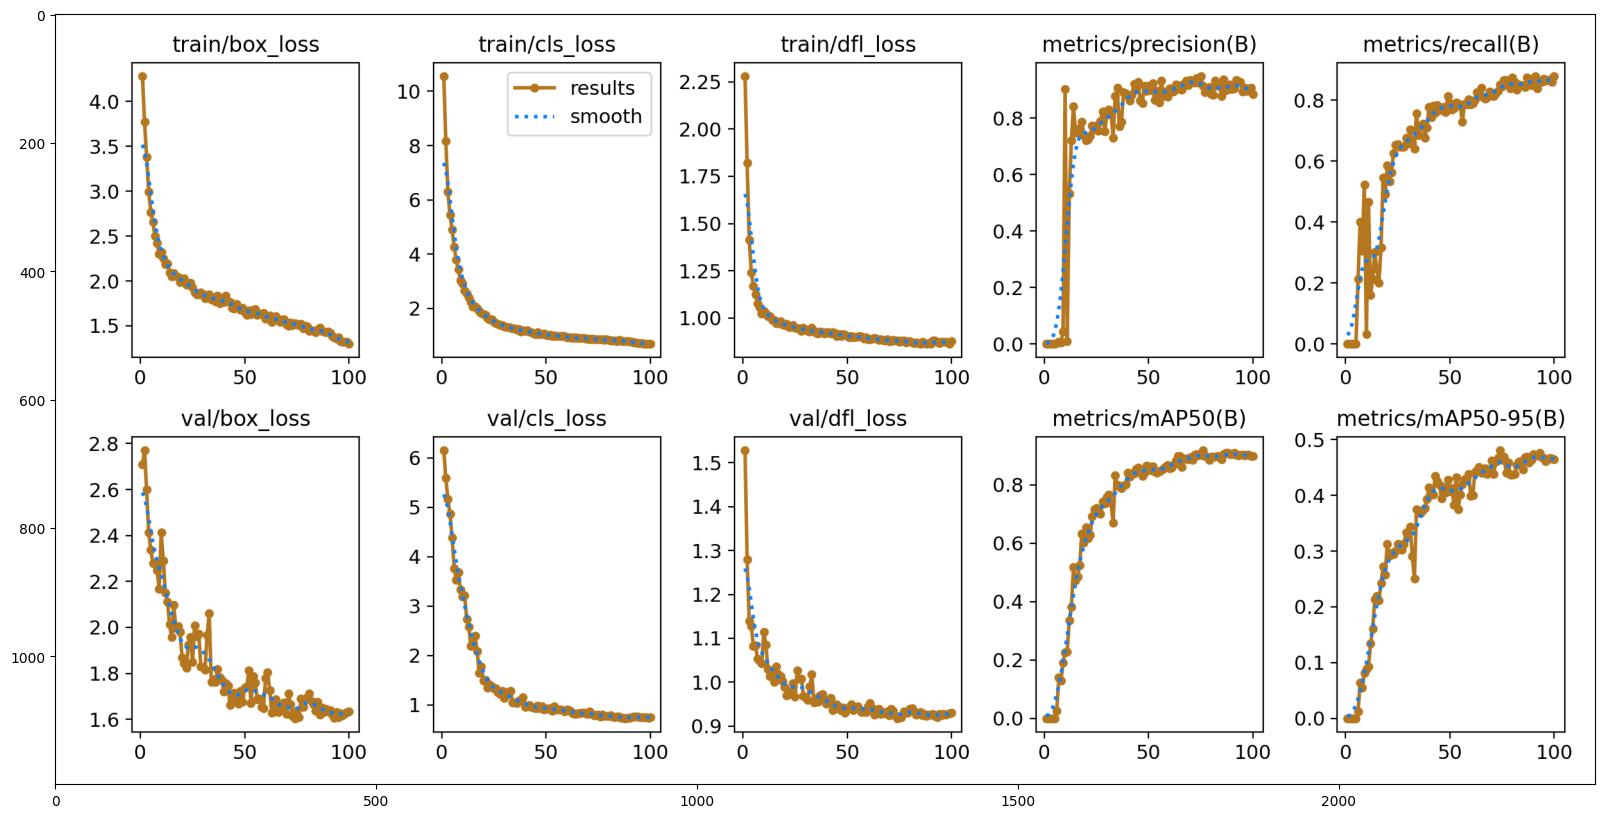

In [9]:
import os
import cv2
import matplotlib.pyplot as plt
training_save_dir = './' + str(results.save_dir)

plt.figure(figsize=(20, 10))
img = cv2.imread(os.path.join(training_save_dir, 'results.png'))
plt.imshow(img)
plt.show()

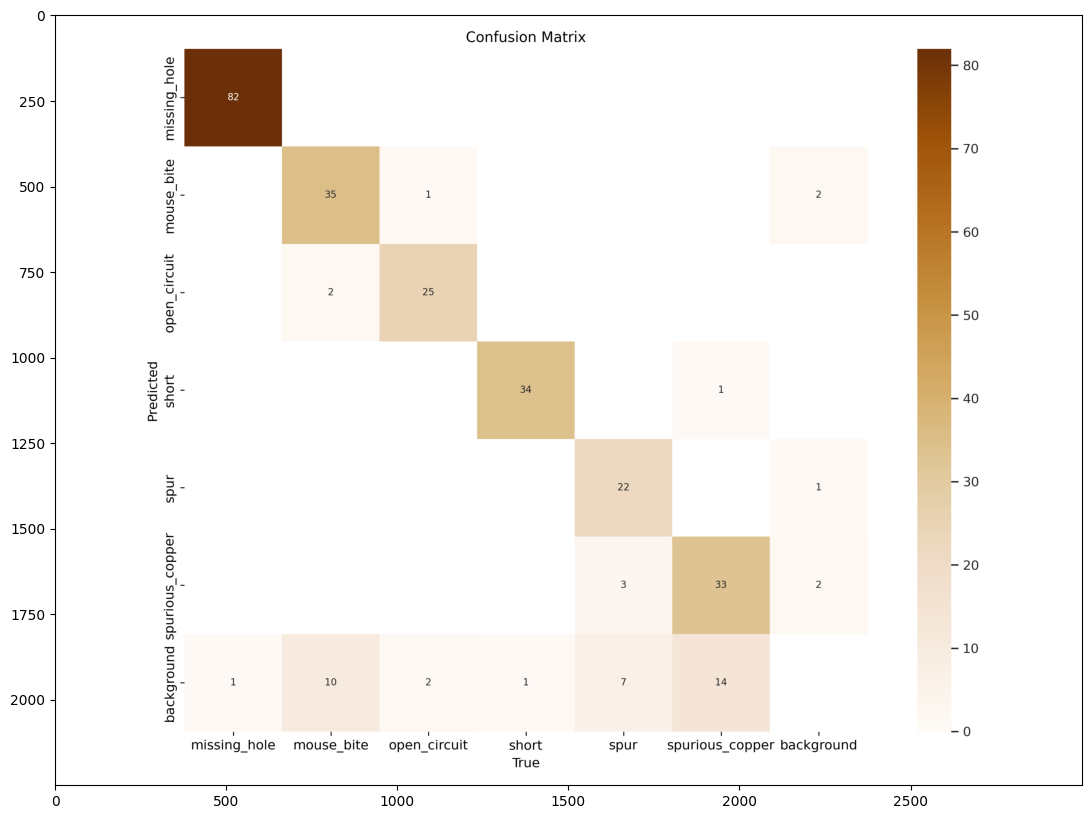

In [10]:
plt.figure(figsize=(20, 10))
img = cv2.imread(os.path.join(training_save_dir, 'confusion_matrix.png'))
plt.imshow(img)
plt.show()

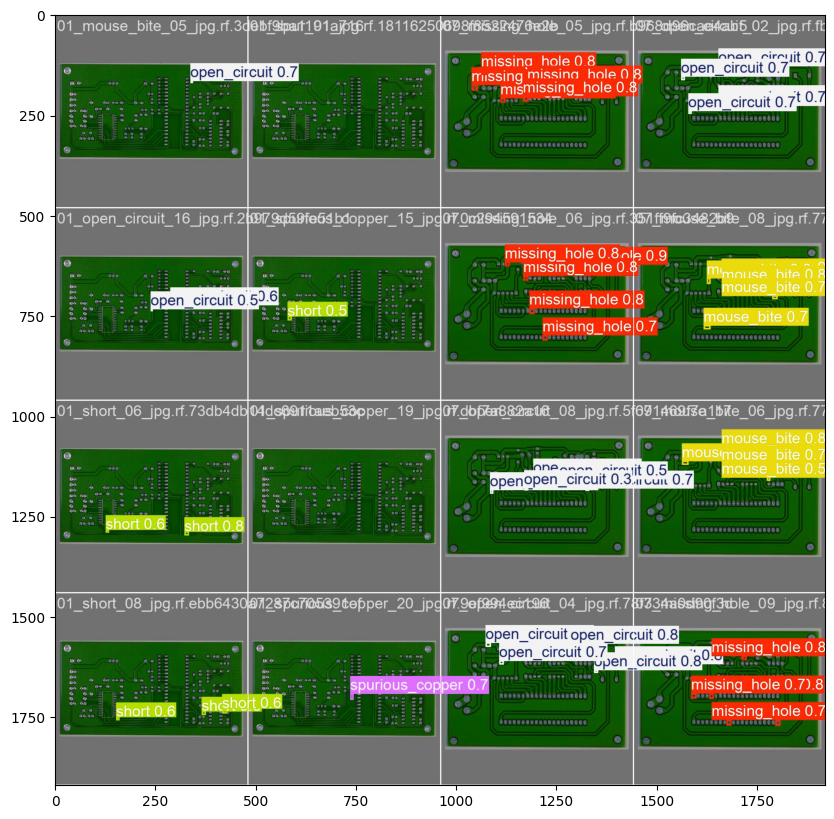

In [11]:
plt.figure(figsize=(20, 10))
img = cv2.imread(os.path.join(training_save_dir, 'val_batch0_pred.jpg'))
plt.imshow(img)
plt.show()

In [12]:
trained_model = YOLO('./' + str(results.save_dir) + '/weights/best.pt')
predictions = trained_model.predict(
    source="/content/PCB_Dataset_Defect/test/images",
    conf=0.6, save=True, save_crop=True, save_txt=True, save_conf=True)


image 1/90 /content/PCB_Dataset_Defect/test/images/01_missing_hole_04_jpg.rf.1e934c631d710228f4eadb7cd1561c42.jpg: 352x640 3 missing_holes, 60.0ms
image 2/90 /content/PCB_Dataset_Defect/test/images/01_missing_hole_12_jpg.rf.83deb4b76037550314b7c36d3423ac28.jpg: 352x640 3 missing_holes, 9.5ms
image 3/90 /content/PCB_Dataset_Defect/test/images/01_missing_hole_18_jpg.rf.9ec8598a7601f780dbcf180693fa667b.jpg: 352x640 2 missing_holes, 6.8ms
image 4/90 /content/PCB_Dataset_Defect/test/images/01_mouse_bite_10_jpg.rf.c24eca0f4c040cd855102e0b38972b0c.jpg: 352x640 (no detections), 6.9ms
image 5/90 /content/PCB_Dataset_Defect/test/images/01_mouse_bite_11_jpg.rf.4142e2d744b514b58dd9c8c9a4df3c8c.jpg: 352x640 (no detections), 7.2ms
image 6/90 /content/PCB_Dataset_Defect/test/images/01_mouse_bite_12_jpg.rf.0135ec81d2b812334f694ee8327a4d72.jpg: 352x640 (no detections), 6.9ms
image 7/90 /content/PCB_Dataset_Defect/test/images/01_open_circuit_02_jpg.rf.6ca144d7f73c0bf7f4aec2669271e058.jpg: 352x640 (no d

In [13]:
text = """
path: ../PCB_Dataset_Defect
train: train/images
val: test/images

# Classes
nc: 6
names: ['missing_hole','mouse_bite','open_circuit','short', 'spur','spurious_copper']
"""
with open("./test.yaml", 'w') as file:
    file.write(text)

metrics = trained_model.val(data="./test.yaml")

Ultralytics YOLOv8.2.83 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/PCB_Dataset_Defect/test/labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 1726.12it/s]

val: New cache created: /content/PCB_Dataset_Defect/test/labels.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.25s/it]


                   all         90        377      0.882      0.838      0.875       0.44
          missing_hole         12         54      0.981      0.979      0.994        0.6
            mouse_bite         14         60      0.774      0.733      0.795      0.391
          open_circuit         13         45      0.843      0.716      0.757      0.294
                 short         13         59      0.905      0.932      0.959      0.505
                  spur         22         84      0.844      0.762        0.8      0.357
       spurious_copper         16         75      0.944      0.907      0.946      0.496
Speed: 0.2ms preprocess, 11.1ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val


In [14]:
from sahi.predict import predict
predictions = predict(
    source='/content/PCB_Dataset_Defect/test/images',
    model_type = "yolov8",
    model_path = './' + str(results.save_dir) + '/weights/best.pt',
    model_confidence_threshold=0.6,
    model_device='cuda:0',
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
    return_dict=True
  )

There are 90 listed files in folder: images/


Performing inference on images:   0%|          | 0/90 [00:00<?, ?it/s]

Performing prediction on 154 slices.


Performing inference on images:   0%|          | 0/90 [00:02<?, ?it/s]

Prediction time is: 2049.38 ms


Performing inference on images:   1%|          | 1/90 [00:02<03:39,  2.46s/it]

Performing prediction on 120 slices.


Performing inference on images:   1%|          | 1/90 [00:04<03:39,  2.46s/it]

Prediction time is: 2045.44 ms


Performing inference on images:   2%|▏         | 2/90 [00:05<03:37,  2.48s/it]

Performing prediction on 121 slices.


Performing inference on images:   2%|▏         | 2/90 [00:07<03:37,  2.48s/it]

Prediction time is: 2240.81 ms


Performing inference on images:   3%|▎         | 3/90 [00:07<03:41,  2.55s/it]

Performing prediction on 120 slices.


Performing inference on images:   3%|▎         | 3/90 [00:09<03:41,  2.55s/it]

Prediction time is: 2258.76 ms


Performing inference on images:   4%|▍         | 4/90 [00:10<03:44,  2.61s/it]

Performing prediction on 143 slices.


Performing inference on images:   4%|▍         | 4/90 [00:12<03:44,  2.61s/it]

Prediction time is: 2359.82 ms


Performing inference on images:   6%|▌         | 5/90 [00:13<03:43,  2.64s/it]

Performing prediction on 120 slices.


Performing inference on images:   6%|▌         | 5/90 [00:14<03:43,  2.64s/it]

Prediction time is: 1429.27 ms


Performing inference on images:   7%|▋         | 6/90 [00:14<03:15,  2.33s/it]

Performing prediction on 143 slices.


Performing inference on images:   7%|▋         | 6/90 [00:16<03:15,  2.33s/it]

Prediction time is: 1717.44 ms


Performing inference on images:   8%|▊         | 7/90 [00:16<03:05,  2.23s/it]

Performing prediction on 121 slices.


Performing inference on images:   8%|▊         | 7/90 [00:18<03:05,  2.23s/it]

Prediction time is: 2011.59 ms


Performing inference on images:   9%|▉         | 8/90 [00:19<03:04,  2.25s/it]

Performing prediction on 120 slices.


Performing inference on images:   9%|▉         | 8/90 [00:20<03:04,  2.25s/it]

Prediction time is: 1428.07 ms


Performing inference on images:  10%|█         | 9/90 [00:20<02:49,  2.09s/it]

Performing prediction on 169 slices.


Performing inference on images:  10%|█         | 9/90 [00:23<02:49,  2.09s/it]

Prediction time is: 2471.63 ms


Performing inference on images:  11%|█         | 10/90 [00:23<03:09,  2.37s/it]

Performing prediction on 120 slices.


Performing inference on images:  11%|█         | 10/90 [00:26<03:09,  2.37s/it]

Prediction time is: 2271.30 ms


Performing inference on images:  12%|█▏        | 11/90 [00:26<03:15,  2.47s/it]

Performing prediction on 169 slices.


Performing inference on images:  12%|█▏        | 11/90 [00:29<03:15,  2.47s/it]

Prediction time is: 3185.69 ms


Performing inference on images:  13%|█▎        | 12/90 [00:31<04:01,  3.09s/it]

Performing prediction on 121 slices.


Performing inference on images:  13%|█▎        | 12/90 [00:32<04:01,  3.09s/it]

Prediction time is: 1740.60 ms


Performing inference on images:  14%|█▍        | 13/90 [00:33<03:33,  2.77s/it]

Performing prediction on 120 slices.


Performing inference on images:  14%|█▍        | 13/90 [00:34<03:33,  2.77s/it]

Prediction time is: 1435.31 ms


Performing inference on images:  16%|█▌        | 14/90 [00:34<03:07,  2.46s/it]

Performing prediction on 121 slices.


Performing inference on images:  16%|█▌        | 14/90 [00:36<03:07,  2.46s/it]

Prediction time is: 1481.60 ms


Performing inference on images:  17%|█▋        | 15/90 [00:36<02:48,  2.25s/it]

Performing prediction on 121 slices.


Performing inference on images:  17%|█▋        | 15/90 [00:38<02:48,  2.25s/it]

Prediction time is: 1458.33 ms


Performing inference on images:  18%|█▊        | 16/90 [00:38<02:34,  2.09s/it]

Performing prediction on 168 slices.


Performing inference on images:  18%|█▊        | 16/90 [00:40<02:34,  2.09s/it]

Prediction time is: 2280.42 ms


Performing inference on images:  19%|█▉        | 17/90 [00:40<02:45,  2.27s/it]

Performing prediction on 154 slices.


Performing inference on images:  19%|█▉        | 17/90 [00:43<02:45,  2.27s/it]

Prediction time is: 2352.76 ms


Performing inference on images:  20%|██        | 18/90 [00:43<02:55,  2.44s/it]

Performing prediction on 120 slices.


Performing inference on images:  20%|██        | 18/90 [00:46<02:55,  2.44s/it]

Prediction time is: 2319.57 ms


Performing inference on images:  21%|██        | 19/90 [00:46<03:00,  2.54s/it]

Performing prediction on 154 slices.


Performing inference on images:  21%|██        | 19/90 [00:49<03:00,  2.54s/it]

Prediction time is: 2768.39 ms


Performing inference on images:  22%|██▏       | 20/90 [00:49<03:10,  2.72s/it]

Performing prediction on 143 slices.


Performing inference on images:  22%|██▏       | 20/90 [00:51<03:10,  2.72s/it]

Prediction time is: 2095.38 ms


Performing inference on images:  23%|██▎       | 21/90 [00:52<03:01,  2.63s/it]

Performing prediction on 121 slices.


Performing inference on images:  23%|██▎       | 21/90 [00:53<03:01,  2.63s/it]

Prediction time is: 1467.73 ms


Performing inference on images:  24%|██▍       | 22/90 [00:53<02:40,  2.37s/it]

Performing prediction on 169 slices.


Performing inference on images:  24%|██▍       | 22/90 [00:56<02:40,  2.37s/it]

Prediction time is: 2176.05 ms


Performing inference on images:  26%|██▌       | 23/90 [00:56<02:42,  2.42s/it]

Performing prediction on 154 slices.


Performing inference on images:  26%|██▌       | 23/90 [00:58<02:42,  2.42s/it]

Prediction time is: 1817.84 ms


Performing inference on images:  27%|██▋       | 24/90 [00:58<02:34,  2.35s/it]

Performing prediction on 143 slices.


Performing inference on images:  27%|██▋       | 24/90 [01:01<02:34,  2.35s/it]

Prediction time is: 2573.99 ms


Performing inference on images:  28%|██▊       | 25/90 [01:01<02:45,  2.55s/it]

Performing prediction on 140 slices.


Performing inference on images:  28%|██▊       | 25/90 [01:04<02:45,  2.55s/it]

Prediction time is: 2691.49 ms


Performing inference on images:  29%|██▉       | 26/90 [01:04<02:55,  2.74s/it]

Performing prediction on 168 slices.


Performing inference on images:  29%|██▉       | 26/90 [01:07<02:55,  2.74s/it]

Prediction time is: 2840.30 ms


Performing inference on images:  30%|███       | 27/90 [01:08<03:02,  2.89s/it]

Performing prediction on 121 slices.


Performing inference on images:  30%|███       | 27/90 [01:09<03:02,  2.89s/it]

Prediction time is: 1457.40 ms


Performing inference on images:  31%|███       | 28/90 [01:09<02:38,  2.55s/it]

Performing prediction on 180 slices.


Performing inference on images:  31%|███       | 28/90 [01:12<02:38,  2.55s/it]

Prediction time is: 2391.21 ms


Performing inference on images:  32%|███▏      | 29/90 [01:12<02:40,  2.63s/it]

Performing prediction on 120 slices.


Performing inference on images:  32%|███▏      | 29/90 [01:14<02:40,  2.63s/it]

Prediction time is: 1470.25 ms


Performing inference on images:  33%|███▎      | 30/90 [01:14<02:22,  2.38s/it]

Performing prediction on 168 slices.


Performing inference on images:  33%|███▎      | 30/90 [01:16<02:22,  2.38s/it]

Prediction time is: 2029.46 ms


Performing inference on images:  34%|███▍      | 31/90 [01:16<02:21,  2.39s/it]

Performing prediction on 120 slices.


Performing inference on images:  34%|███▍      | 31/90 [01:18<02:21,  2.39s/it]

Prediction time is: 2051.41 ms


Performing inference on images:  36%|███▌      | 32/90 [01:19<02:20,  2.42s/it]

Performing prediction on 110 slices.


Performing inference on images:  36%|███▌      | 32/90 [01:21<02:20,  2.42s/it]

Prediction time is: 2161.17 ms


Performing inference on images:  37%|███▋      | 33/90 [01:21<02:19,  2.45s/it]

Performing prediction on 180 slices.


Performing inference on images:  37%|███▋      | 33/90 [01:25<02:19,  2.45s/it]

Prediction time is: 3291.92 ms


Performing inference on images:  38%|███▊      | 34/90 [01:25<02:39,  2.84s/it]

Performing prediction on 121 slices.


Performing inference on images:  38%|███▊      | 34/90 [01:27<02:39,  2.84s/it]

Prediction time is: 1477.55 ms


Performing inference on images:  39%|███▉      | 35/90 [01:27<02:18,  2.52s/it]

Performing prediction on 120 slices.


Performing inference on images:  39%|███▉      | 35/90 [01:28<02:18,  2.52s/it]

Prediction time is: 1454.82 ms


Performing inference on images:  40%|████      | 36/90 [01:29<02:04,  2.31s/it]

Performing prediction on 169 slices.


Performing inference on images:  40%|████      | 36/90 [01:31<02:04,  2.31s/it]

Prediction time is: 2058.28 ms


Performing inference on images:  41%|████      | 37/90 [01:31<02:04,  2.34s/it]

Performing prediction on 168 slices.


Performing inference on images:  41%|████      | 37/90 [01:34<02:04,  2.34s/it]

Prediction time is: 2693.38 ms


Performing inference on images:  42%|████▏     | 38/90 [01:34<02:15,  2.61s/it]

Performing prediction on 180 slices.


Performing inference on images:  42%|████▏     | 38/90 [01:38<02:15,  2.61s/it]

Prediction time is: 3321.49 ms


Performing inference on images:  43%|████▎     | 39/90 [01:38<02:33,  3.01s/it]

Performing prediction on 120 slices.


Performing inference on images:  43%|████▎     | 39/90 [01:41<02:33,  3.01s/it]

Prediction time is: 2317.31 ms


Performing inference on images:  44%|████▍     | 40/90 [01:41<02:27,  2.95s/it]

Performing prediction on 121 slices.


Performing inference on images:  44%|████▍     | 40/90 [01:43<02:27,  2.95s/it]

Prediction time is: 1822.22 ms


Performing inference on images:  46%|████▌     | 41/90 [01:43<02:12,  2.70s/it]

Performing prediction on 169 slices.


Performing inference on images:  46%|████▌     | 41/90 [01:46<02:12,  2.70s/it]

Prediction time is: 2400.90 ms


Performing inference on images:  47%|████▋     | 42/90 [01:46<02:10,  2.73s/it]

Performing prediction on 154 slices.


Performing inference on images:  47%|████▋     | 42/90 [01:48<02:10,  2.73s/it]

Prediction time is: 1852.34 ms


Performing inference on images:  48%|████▊     | 43/90 [01:48<02:00,  2.57s/it]

Performing prediction on 121 slices.


Performing inference on images:  48%|████▊     | 43/90 [01:50<02:00,  2.57s/it]

Prediction time is: 1456.60 ms


Performing inference on images:  49%|████▉     | 44/90 [01:50<01:46,  2.32s/it]

Performing prediction on 180 slices.


Performing inference on images:  49%|████▉     | 44/90 [01:52<01:46,  2.32s/it]

Prediction time is: 2225.45 ms


Performing inference on images:  50%|█████     | 45/90 [01:53<01:51,  2.48s/it]

Performing prediction on 120 slices.


Performing inference on images:  50%|█████     | 45/90 [01:55<01:51,  2.48s/it]

Prediction time is: 2208.92 ms


Performing inference on images:  51%|█████     | 46/90 [01:56<01:51,  2.53s/it]

Performing prediction on 121 slices.


Performing inference on images:  51%|█████     | 46/90 [01:59<01:51,  2.53s/it]

Prediction time is: 3120.38 ms


Performing inference on images:  52%|█████▏    | 47/90 [01:59<02:01,  2.83s/it]

Performing prediction on 169 slices.


Performing inference on images:  52%|█████▏    | 47/90 [02:02<02:01,  2.83s/it]

Prediction time is: 2496.37 ms


Performing inference on images:  53%|█████▎    | 48/90 [02:02<01:59,  2.84s/it]

Performing prediction on 121 slices.


Performing inference on images:  53%|█████▎    | 48/90 [02:03<01:59,  2.84s/it]

Prediction time is: 1449.78 ms


Performing inference on images:  54%|█████▍    | 49/90 [02:04<01:43,  2.51s/it]

Performing prediction on 140 slices.


Performing inference on images:  54%|█████▍    | 49/90 [02:05<01:43,  2.51s/it]

Prediction time is: 1666.90 ms


Performing inference on images:  56%|█████▌    | 50/90 [02:06<01:34,  2.35s/it]

Performing prediction on 120 slices.


Performing inference on images:  56%|█████▌    | 50/90 [02:07<01:34,  2.35s/it]

Prediction time is: 1425.99 ms


Performing inference on images:  57%|█████▋    | 51/90 [02:07<01:24,  2.17s/it]

Performing prediction on 180 slices.


Performing inference on images:  57%|█████▋    | 51/90 [02:10<01:24,  2.17s/it]

Prediction time is: 2179.03 ms


Performing inference on images:  58%|█████▊    | 52/90 [02:10<01:27,  2.31s/it]

Performing prediction on 154 slices.


Performing inference on images:  58%|█████▊    | 52/90 [02:13<01:27,  2.31s/it]

Prediction time is: 2702.97 ms


Performing inference on images:  59%|█████▉    | 53/90 [02:13<01:35,  2.57s/it]

Performing prediction on 120 slices.


Performing inference on images:  59%|█████▉    | 53/90 [02:15<01:35,  2.57s/it]

Prediction time is: 2316.66 ms


Performing inference on images:  60%|██████    | 54/90 [02:16<01:34,  2.63s/it]

Performing prediction on 154 slices.


Performing inference on images:  60%|██████    | 54/90 [02:18<01:34,  2.63s/it]

Prediction time is: 2541.91 ms


Performing inference on images:  61%|██████    | 55/90 [02:19<01:34,  2.71s/it]

Performing prediction on 169 slices.


Performing inference on images:  61%|██████    | 55/90 [02:21<01:34,  2.71s/it]

Prediction time is: 2028.87 ms


Performing inference on images:  62%|██████▏   | 56/90 [02:21<01:28,  2.61s/it]

Performing prediction on 120 slices.


Performing inference on images:  62%|██████▏   | 56/90 [02:23<01:28,  2.61s/it]

Prediction time is: 1436.53 ms


Performing inference on images:  63%|██████▎   | 57/90 [02:23<01:17,  2.36s/it]

Performing prediction on 143 slices.


Performing inference on images:  63%|██████▎   | 57/90 [02:25<01:17,  2.36s/it]

Prediction time is: 2077.22 ms


Performing inference on images:  64%|██████▍   | 58/90 [02:25<01:15,  2.37s/it]

Performing prediction on 143 slices.


Performing inference on images:  64%|██████▍   | 58/90 [02:27<01:15,  2.37s/it]

Prediction time is: 1695.28 ms


Performing inference on images:  66%|██████▌   | 59/90 [02:27<01:10,  2.26s/it]

Performing prediction on 120 slices.


Performing inference on images:  66%|██████▌   | 59/90 [02:29<01:10,  2.26s/it]

Prediction time is: 2019.14 ms


Performing inference on images:  67%|██████▋   | 60/90 [02:30<01:11,  2.39s/it]

Performing prediction on 140 slices.


Performing inference on images:  67%|██████▋   | 60/90 [02:33<01:11,  2.39s/it]

Prediction time is: 2673.17 ms


Performing inference on images:  68%|██████▊   | 61/90 [02:33<01:15,  2.61s/it]

Performing prediction on 154 slices.


Performing inference on images:  68%|██████▊   | 61/90 [02:36<01:15,  2.61s/it]

Prediction time is: 2915.85 ms


Performing inference on images:  69%|██████▉   | 62/90 [02:37<01:18,  2.82s/it]

Performing prediction on 169 slices.


Performing inference on images:  69%|██████▉   | 62/90 [02:39<01:18,  2.82s/it]

Prediction time is: 2062.06 ms


Performing inference on images:  70%|███████   | 63/90 [02:39<01:13,  2.71s/it]

Performing prediction on 143 slices.


Performing inference on images:  70%|███████   | 63/90 [02:41<01:13,  2.71s/it]

Prediction time is: 1712.70 ms


Performing inference on images:  71%|███████   | 64/90 [02:41<01:05,  2.50s/it]

Performing prediction on 169 slices.


Performing inference on images:  71%|███████   | 64/90 [02:43<01:05,  2.50s/it]

Prediction time is: 2014.83 ms


Performing inference on images:  72%|███████▏  | 65/90 [02:43<01:01,  2.48s/it]

Performing prediction on 120 slices.


Performing inference on images:  72%|███████▏  | 65/90 [02:45<01:01,  2.48s/it]

Prediction time is: 1439.20 ms


Performing inference on images:  73%|███████▎  | 66/90 [02:46<00:57,  2.38s/it]

Performing prediction on 120 slices.


Performing inference on images:  73%|███████▎  | 66/90 [02:47<00:57,  2.38s/it]

Prediction time is: 1915.75 ms


Performing inference on images:  74%|███████▍  | 67/90 [02:48<00:54,  2.37s/it]

Performing prediction on 121 slices.


Performing inference on images:  74%|███████▍  | 67/90 [02:50<00:54,  2.37s/it]

Prediction time is: 2322.61 ms


Performing inference on images:  76%|███████▌  | 68/90 [02:51<00:54,  2.48s/it]

Performing prediction on 168 slices.


Performing inference on images:  76%|███████▌  | 68/90 [02:54<00:54,  2.48s/it]

Prediction time is: 3222.20 ms


Performing inference on images:  77%|███████▋  | 69/90 [02:54<01:00,  2.87s/it]

Performing prediction on 168 slices.


Performing inference on images:  77%|███████▋  | 69/90 [02:57<01:00,  2.87s/it]

Prediction time is: 2502.50 ms


Performing inference on images:  78%|███████▊  | 70/90 [02:57<00:57,  2.88s/it]

Performing prediction on 180 slices.


Performing inference on images:  78%|███████▊  | 70/90 [03:00<00:57,  2.88s/it]

Prediction time is: 2249.20 ms


Performing inference on images:  79%|███████▉  | 71/90 [03:00<00:53,  2.82s/it]

Performing prediction on 154 slices.


Performing inference on images:  79%|███████▉  | 71/90 [03:02<00:53,  2.82s/it]

Prediction time is: 1877.74 ms


Performing inference on images:  80%|████████  | 72/90 [03:03<00:49,  2.78s/it]

Performing prediction on 180 slices.


Performing inference on images:  80%|████████  | 72/90 [03:06<00:49,  2.78s/it]

Prediction time is: 2914.96 ms


Performing inference on images:  81%|████████  | 73/90 [03:06<00:50,  2.97s/it]

Performing prediction on 120 slices.


Performing inference on images:  81%|████████  | 73/90 [03:08<00:50,  2.97s/it]

Prediction time is: 2199.73 ms


Performing inference on images:  82%|████████▏ | 74/90 [03:09<00:45,  2.87s/it]

Performing prediction on 180 slices.


Performing inference on images:  82%|████████▏ | 74/90 [03:12<00:45,  2.87s/it]

Prediction time is: 3439.76 ms


Performing inference on images:  83%|████████▎ | 75/90 [03:13<00:50,  3.40s/it]

Performing prediction on 120 slices.


Performing inference on images:  83%|████████▎ | 75/90 [03:15<00:50,  3.40s/it]

Prediction time is: 2042.39 ms


Performing inference on images:  84%|████████▍ | 76/90 [03:16<00:43,  3.09s/it]

Performing prediction on 180 slices.


Performing inference on images:  84%|████████▍ | 76/90 [03:18<00:43,  3.09s/it]

Prediction time is: 2155.33 ms


Performing inference on images:  86%|████████▌ | 77/90 [03:18<00:38,  2.95s/it]

Performing prediction on 121 slices.


Performing inference on images:  86%|████████▌ | 77/90 [03:20<00:38,  2.95s/it]

Prediction time is: 1448.26 ms


Performing inference on images:  87%|████████▋ | 78/90 [03:20<00:31,  2.58s/it]

Performing prediction on 121 slices.


Performing inference on images:  87%|████████▋ | 78/90 [03:22<00:31,  2.58s/it]

Prediction time is: 1450.87 ms


Performing inference on images:  88%|████████▊ | 79/90 [03:22<00:25,  2.33s/it]

Performing prediction on 154 slices.


Performing inference on images:  88%|████████▊ | 79/90 [03:24<00:25,  2.33s/it]

Prediction time is: 1840.86 ms


Performing inference on images:  89%|████████▉ | 80/90 [03:24<00:22,  2.30s/it]

Performing prediction on 154 slices.


Performing inference on images:  89%|████████▉ | 80/90 [03:26<00:22,  2.30s/it]

Prediction time is: 2341.61 ms


Performing inference on images:  90%|█████████ | 81/90 [03:27<00:22,  2.46s/it]

Performing prediction on 143 slices.


Performing inference on images:  90%|█████████ | 81/90 [03:30<00:22,  2.46s/it]

Prediction time is: 2751.41 ms


Performing inference on images:  91%|█████████ | 82/90 [03:30<00:21,  2.69s/it]

Performing prediction on 120 slices.


Performing inference on images:  91%|█████████ | 82/90 [03:32<00:21,  2.69s/it]

Prediction time is: 2293.90 ms


Performing inference on images:  92%|█████████▏| 83/90 [03:33<00:18,  2.67s/it]

Performing prediction on 120 slices.


Performing inference on images:  92%|█████████▏| 83/90 [03:34<00:18,  2.67s/it]

Prediction time is: 1494.10 ms


Performing inference on images:  93%|█████████▎| 84/90 [03:35<00:14,  2.42s/it]

Performing prediction on 120 slices.


Performing inference on images:  93%|█████████▎| 84/90 [03:36<00:14,  2.42s/it]

Prediction time is: 1445.62 ms


Performing inference on images:  94%|█████████▍| 85/90 [03:36<00:11,  2.22s/it]

Performing prediction on 154 slices.


Performing inference on images:  94%|█████████▍| 85/90 [03:38<00:11,  2.22s/it]

Prediction time is: 1880.63 ms


Performing inference on images:  96%|█████████▌| 86/90 [03:39<00:08,  2.23s/it]

Performing prediction on 143 slices.


Performing inference on images:  96%|█████████▌| 86/90 [03:40<00:08,  2.23s/it]

Prediction time is: 1703.57 ms


Performing inference on images:  97%|█████████▋| 87/90 [03:41<00:06,  2.16s/it]

Performing prediction on 110 slices.


Performing inference on images:  97%|█████████▋| 87/90 [03:42<00:06,  2.16s/it]

Prediction time is: 1341.63 ms


Performing inference on images:  98%|█████████▊| 88/90 [03:42<00:03,  2.00s/it]

Performing prediction on 120 slices.


Performing inference on images:  98%|█████████▊| 88/90 [03:44<00:03,  2.00s/it]

Prediction time is: 2115.69 ms


Performing inference on images:  99%|█████████▉| 89/90 [03:45<00:02,  2.17s/it]

Performing prediction on 154 slices.


Performing inference on images:  99%|█████████▉| 89/90 [03:48<00:02,  2.17s/it]

Prediction time is: 3035.36 ms


Performing inference on images: 100%|██████████| 90/90 [03:49<00:00,  2.55s/it]

Prediction results are successfully exported to runs/predict/exp


In [44]:
import glob
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction, predict, get_prediction

detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path='./' + str(results.save_dir) + '/weights/best.pt',
    confidence_threshold=0.6,
    image_size=640,
    device="cuda:0",
    load_at_init=True,
)

for source in glob.glob('/content/PCB_Dataset_Defect/test/images/*'):
  result = get_sliced_prediction(
      source,
      detection_model,
      slice_height = 256,
      slice_width = 256,
      overlap_height_ratio = 0.2,
      overlap_width_ratio = 0.2,
  )
  result.to_coco_annotations()[:3]
  result.to_coco_predictions(image_id=1)[:3]
  result.to_imantics_annotations()[:3]

Performing prediction on 154 slices.
Performing prediction on 120 slices.
Performing prediction on 121 slices.
Performing prediction on 120 slices.
Performing prediction on 143 slices.
Performing prediction on 120 slices.
Performing prediction on 143 slices.
Performing prediction on 121 slices.
Performing prediction on 120 slices.
Performing prediction on 169 slices.
Performing prediction on 120 slices.
Performing prediction on 169 slices.
Performing prediction on 121 slices.
Performing prediction on 120 slices.
Performing prediction on 121 slices.
Performing prediction on 121 slices.
Performing prediction on 168 slices.
Performing prediction on 154 slices.
Performing prediction on 120 slices.
Performing prediction on 154 slices.
Performing prediction on 143 slices.
Performing prediction on 121 slices.
Performing prediction on 169 slices.
Performing prediction on 154 slices.
Performing prediction on 143 slices.
Performing prediction on 140 slices.
Performing prediction on 168 slices.
P

In [16]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!cp -rp "./runs" "/content/drive/MyDrive/runs"
!cp -rp "./yolov8n" "/content/drive/MyDrive/yolov8n"

cp: cannot stat './yolov8n': No such file or directory
